# Causalidad

In [1]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

- 31 pacients con dolor lumbar asignados al azar.

Tratamiento: 

- 15 pacientes en el grupo de tratamiento
- Se le suministro el medicamento

Control: 

- 16 pacientes en el grupo de control.
- Se le suministro suero fisiol√≥gico(salina normal)



Los m√©dicos que suministraban el medicamento: 
- No conocian cual era el grupo de control y tratamiento, es decir, no sabian cual era el medicamento suministrado(salina o el tratamiento para el dolor de espalda)
 

In [2]:
bta = Table.read_table('bta.csv')
bta.show()

In [3]:
bta.group("Group")

Group     | count
Control   | 16
Treatment | 15

In [4]:
bta.group("Group", np.sum)

Group     | Result sum
Control   | 2
Treatment | 9

¬øQue conclusiones podemos sacar, leyendo este dataset?

In [5]:
bta.group("Group", np.average)

Group     | Result average
Control   | 0.125
Treatment | 0.6

- 60% de los pacientes se recuperaron en el grupo de control
- 12.5% se recuperacron en el grupo de tratamiento

In [8]:
resultados_observados = Table.read_table("resultados_observados.csv")

1. ¬øQue resultados hubiera obtenido el grupo de control si se asigna al grupo de tratamiento?, 
el resultado es desconocido

2. ¬øQue resultados hubiera obtenido el grupo de tratamiento  si se asigna al grupo de control?, 
el resultado es desconocido

In [9]:
resultados_observados.show()

In [12]:
bta.group('Group', np.average)

Group     | Result average
Control   | 0.125
Treatment | 0.6

In [21]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

In [22]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [23]:
distance(bta, 'Group')

0.475

In [37]:
shuffled_labels = bta.sample(with_replacement=False).column(0)

In [38]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels.show()

**Causalidad:** la prueba es evidencia de que el tratamiento causa la diferencia

# Otro ejemplo. 

# # üèà El manejo de las pelotas en el f√∫tbol americano (NFL)

En el f√∫tbol americano, especialmente en la **NFL**, el manejo de las pelotas es un aspecto importante y tiene reglas espec√≠ficas. Aqu√≠ te explico c√≥mo funciona:



---

## üìå Cada equipo lleva sus propias pelotas  
- Antes de cada partido, **cada equipo proporciona 12 pelotas oficiales** para usar en sus posesiones ofensivas.  
- Estas pelotas est√°n preparadas seg√∫n las preferencias del equipo (*presi√≥n, textura, grip*, etc.), siempre cumpliendo con las normas de la **NFL**.  
- Adem√°s, se entregan **pelotas especiales** para equipos especiales (*kickoffs, despejes y goles de campo*), conocidas como **K-balls** (que son nuevas y sin modificar).

---

## üìå ¬øPor qu√© a veces se usa m√°s la pelota de un equipo que la del otro?  
Esto depende de **qui√©n est√° a la ofensiva**:  
- Cuando **el equipo A** tiene la posesi√≥n del bal√≥n, se usa **su pelota**.  
- Cuando **el equipo B** tiene la posesi√≥n, se usa **la pelota de ese equipo**.  

üìä Si durante el partido un equipo tiene la posesi√≥n por m√°s tiempo (*por ejemplo, largas series ofensivas*), su pelota se usar√° m√°s.

---

## üìå Intercepciones, fumbles y cambios de posesi√≥n  
- Si ocurre un **fumble** o **intercepci√≥n**, el bal√≥n usado **sigue en juego** hasta que la jugada termine.  
- Luego, al iniciar la siguiente jugada, se cambia a la **pelota del equipo que ahora est√° a la ofensiva**.

---

## üìå Reglas tras el esc√°ndalo del *Deflategate*  
Despu√©s del famoso esc√°ndalo del **Deflategate (2015)**, que es la revisaremos en lo que sigue, la **NFL** reforz√≥ las reglas:

- ‚úÖ Ahora, las pelotas son **revisadas antes del partido** por un **oficial de la NFL**.  
- ‚úÖ Durante el partido, est√°n bajo la **supervisi√≥n de los √°rbitros**.  
-----

La presi√≥n a menudo se mide en libras por pulgada cuadrada (psi). Las reglas de la NFL estipulan que las pelotas de juego deben inflarse para tener presiones en el rango de 12,5 psi y 13,5 psi. Cada equipo juega con 12 bolas. Los equipos tienen la responsabilidad de mantener la presi√≥n en sus propios balones de f√∫tbol, pero los oficiales del juego inspeccionan los balones. Antes del inicio del partido de la AFC, todas las pelotas de los Patriots estaban a unas 12,5 psi. La mayor√≠a de las pelotas de los Colts estaban a unas 13,0 psi. Sin embargo, estos datos previos al partido no se registraron.



In [72]:
football = Table.read_table("team_scores.csv")
football

Team     | Blakeman | Prioleau
Patriots | 11.5     | 11.8
Patriots | 10.85    | 11.2
Patriots | 11.15    | 11.5
Patriots | 10.7     | 11
Patriots | 11.1     | 11.45
Patriots | 11.6     | 11.95
Patriots | 11.85    | 12.3
Patriots | 11.1     | 11.55
Patriots | 10.95    | 11.35
Patriots | 10.5     | 10.9
... (5 rows omitted)

In [73]:
football = football.with_column(
    'Combined', (football.column(1)+football.column(2))/2
    ).drop(1, 2)
football.show()

In [74]:
np.ones(11)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [75]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([ 12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,
        12.5,  12.5,  13. ,  13. ,  13. ,  13. ])

In [76]:
drop = start - football.column('Combined')
football = football.with_column('Pressure Drop', drop)
football.show()

In [77]:
football = football.drop('Combined')
football.group('Team', np.average)

Team     | Pressure Drop average
Colts    | 0.46875
Patriots | 1.20227




¬øC√≥mo llega el azar aqu√≠? No se estaba seleccionando nada al azar. Pero podemos hacer un modelo de azar planteando la hip√≥tesis de que las 11 ca√≠das de los Patriots parecen una muestra aleatoria de 11 de las 15 ca√≠das, siendo las cuatro restantes de las ca√≠das de los Colts. Ese es un modelo de oportunidad completamente especificado bajo el cual podemos simular datos. As√≠ que es la hip√≥tesis nula.

Para la alternativa, podemos tomar la posici√≥n de que las ca√≠das de los Patriots son demasiado grandes, en promedio, para parecerse a una muestra aleatoria extra√≠da de todas las ca√≠das


# Estad√≠stico de prueba

In [78]:
observed_means = football.group('Team', np.average).column(1)
observed_difference = observed_means.item(1) - observed_means.item(0)
observed_difference

0.733522727272728

In [79]:
def difference_of_means(table, group_label):
    reduced = table.select('Pressure Drop', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [81]:
difference_of_means(football, 'Team')

0.733522727272728

In [82]:
shuffled_labels = football.sample(with_replacement=False).column(0)
original_and_shuffled = football.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled.show()

In [83]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.6823863636363636

In [84]:
difference_of_means(original_and_shuffled, 'Team')

0.733522727272728

# Prueba de la permutacion

In [85]:
def one_simulated_difference():
    shuffled_labels = football.sample(with_replacement = False
                                                    ).column('Team')
    shuffled_table = football.select('Pressure Drop').with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [86]:
differences = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

Observed Difference: 0.733522727272728


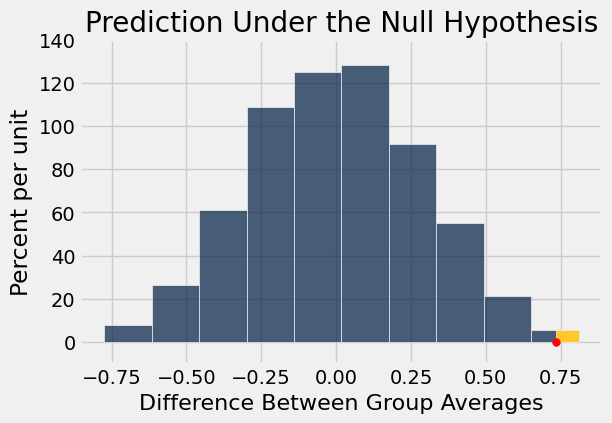

In [87]:
Table().with_column(
    'Difference Between Group Averages', differences).hist(
    left_end = observed_difference
)
plots.ylim(-0.1, 1.4)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

In [88]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 10000
empirical_p

0.0025